<a href="https://colab.research.google.com/github/rksab/NLP/blob/main/Bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
with open('names.txt', 'r') as f:
   names=f.read().split('\n')

In [2]:
len(names)

32033

In [3]:
names[:20]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett']

In [ ]:
min(len(w) for w in names)

2

In [ ]:
max(len(w) for w in names)

15

In [4]:
dict = {}
for w in names:
  chs = ['<s>'] + list(w) +['</s>']
  for ch1, ch2 in zip(chs, chs[1:]):
    dict[(ch1, ch2)] = dict.get((ch1, ch2), 0) + 1
sorted(dict.items(), key = lambda x: -x[1])



[(('n', '</s>'), 6763),
 (('a', '</s>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '</s>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '</s>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '</s>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '</s>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 147

In [5]:
len(set(''.join(names)))

26

Next we need to convert chars into something we can perform computations on. We have 26 unique chars and 2 tokens were added by us. We're going to make a lookup table.

In [6]:
import torch

In [7]:
N = torch.zeros((28, 28), dtype = torch.int32)


In [8]:
chars = sorted(list(set(''.join(names))))
stoi = {s: i  for i, s in enumerate(chars)}
stoi['<s>'] = 26
stoi['</s>'] = 27

In [9]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<s>',
 27: '</s>'}

In [10]:
for w in names:
  chs = ['<s>'] + list(w) +['</s>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[(ix1, ix2)] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

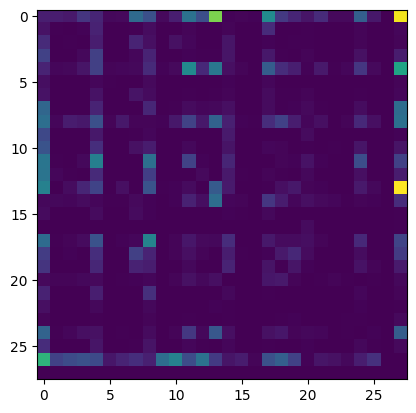

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)


This is ugly! Let's change it into something better looking.

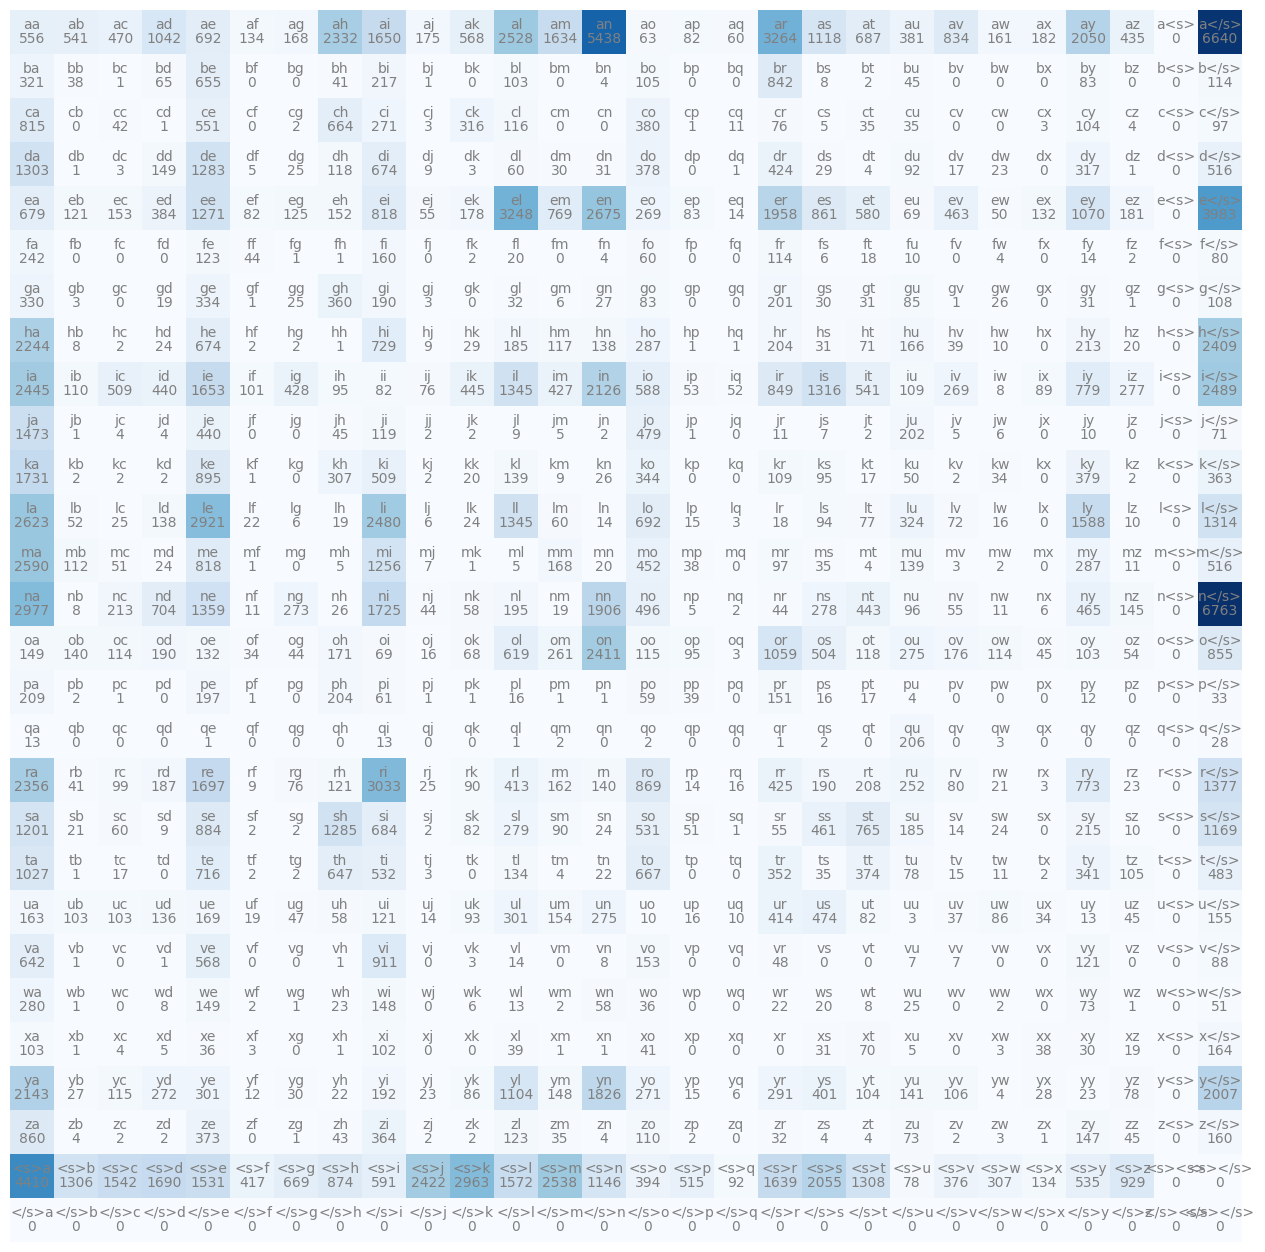

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [22]:
N[0].shape

torch.Size([28])

In [20]:
N.sum(1, keepdim = True)

tensor([[33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,  2900,
          5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,  5570,
          3135,  2573,   929,   697,  9776,  2398,     0, 32033]])

In [34]:
p = N.float()
p /= p.sum(1, keepdim = True)  #use inplace operation if possible instead of p = p/p.sum it creates a new element


In [36]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 26
  while True:
    P = p[ix]
    ix = torch.multinomial(P, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 27:
      break
  print(''.join(out))

karoene</s>
mi</s>
rie</s>
raryli</s>
be</s>
